In [40]:
import CloudClassificationDatasetCNN
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.v2 as v2
import torch.nn as nn
import torch.optim as optim
import numpy as np
batch_size = 7

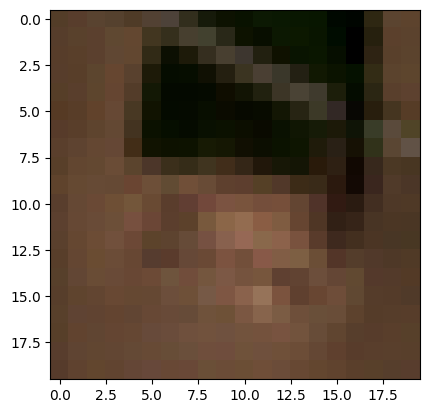

tensor([1, 0])


In [41]:
transforms = v2.Compose([
    v2.RandomHorizontalFlip(),
    v2.RandomVerticalFlip(),
])

train_dataset = CloudClassificationDatasetCNN.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_train.npy",channels=("b04","b03","b02","b01","b05","b06","b07","b08","b09","b11","b12"),transform=transforms)
val_dataset = CloudClassificationDatasetCNN.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_val.npy",channels=("b04","b03","b02","b01","b05","b06","b07","b08","b09","b11","b12"),transform=transforms)

validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
training_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creates an iterator and plots the pictures
it = iter(training_loader)
images, labels = next(it)

plt.figure()
plt.imshow(images[0][:3].permute(1,2,0))
plt.show()

print(labels[0])

In [42]:
class LeNet(nn.Module):
	def __init__(self, numChannels, classes):
		# call the parent constructor
		super(LeNet, self).__init__()

		self.drop = nn.Dropout(0.9)

		# initialize first set of CONV => RELU => POOL layers
		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		# initialize second set of CONV => RELU => POOL layers
		self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		# initialize first (and only) set of FC => RELU layers
		self.fc1 = nn.Linear(in_features=200, out_features=50)
		self.relu3 = nn.ReLU()
		# initialize our softmax classifier
		self.fc2 = nn.Linear(in_features=50, out_features=classes)
		self.logSoftmax = nn.LogSoftmax(dim=1)

	def forward(self, x):
		# pass the input through our first set of CONV => RELU =>
		# POOL layers
		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)
		# pass the output from the previous layer through the second
		# set of CONV => RELU => POOL layers
		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		# flatten the output from the previous layer and pass it
		# through our only set of FC => RELU layers
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		# pass the output to our softmax classifier to get our output
		# predictions
		output = self.fc2(x)
		# return the output predictions
		return output

Epoch: 0 batch_nr: 0 Time: 0.17017070000292733 Time_diff: 0.17017150000901893 loss: 0.2850340008735657
Epoch: 0 batch_nr: 13 Time: 2.335488799988525 Time_diff: 0.16384510000352748 loss: 0.7487769031098911
Epoch: 0 batch_nr: 26 Time: 4.400633799989009 Time_diff: 0.15185179997934029 loss: 0.7752522456425207

 New best loss: 0.6882826008579948


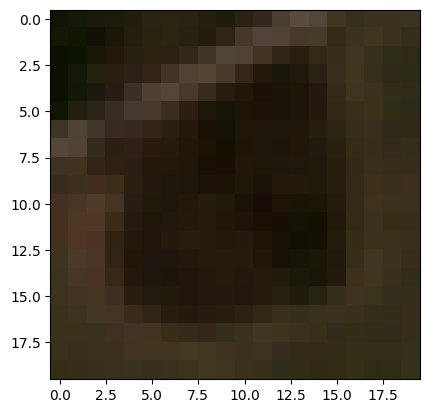

tensor([1, 0])
tensor([0.7931, 0.2069])
Epoch: 1 batch_nr: 12 Time: 9.820630100002745 Time_diff: 0.169241299998248 loss: 0.6068137609041654
Epoch: 1 batch_nr: 25 Time: 11.910854000016116 Time_diff: 0.1547658999916166 loss: 0.6505230103547757

 New best loss: 0.6307655762542378


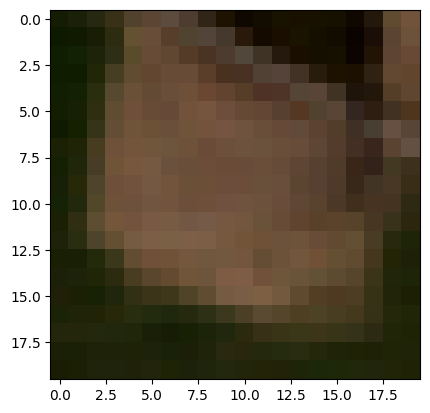

tensor([0, 1])
tensor([0.4283, 0.5717])
Epoch: 2 batch_nr: 11 Time: 17.68509250000352 Time_diff: 0.154542100004619 loss: 0.7152105296651522
Epoch: 2 batch_nr: 24 Time: 19.676975600013975 Time_diff: 0.16031330000259914 loss: 0.7030159115791321
Epoch: 2 batch_nr: 37 Time: 21.59649620001437 Time_diff: 0.02605869999388233 loss: 0.6349751949310303

 New best loss: 0.5780358748002485


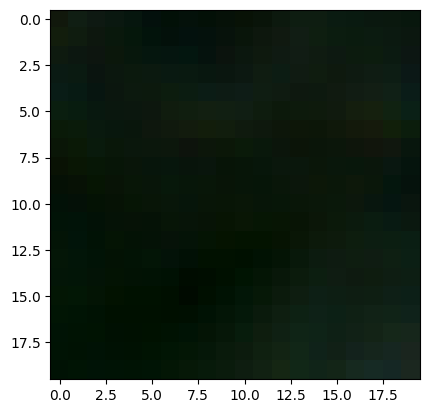

tensor([1, 0])
tensor([0.3642, 0.6358])
Epoch: 3 batch_nr: 10 Time: 25.1448795000033 Time_diff: 0.1582625000155531 loss: 0.6350903781977567
Epoch: 3 batch_nr: 23 Time: 27.169833899999503 Time_diff: 0.14763270001276396 loss: 0.6051301279415687
Epoch: 3 batch_nr: 36 Time: 29.304647500015562 Time_diff: 0.18505679999361746 loss: 0.5922630892412083
new val loss: 0.6050729832865975
Epoch: 4 batch_nr: 9 Time: 32.59965519999969 Time_diff: 0.16263050000998192 loss: 0.5602517575025558
Epoch: 4 batch_nr: 22 Time: 34.63315129998955 Time_diff: 0.15203139997902326 loss: 0.5722869699415953
Epoch: 4 batch_nr: 35 Time: 36.68256760001532 Time_diff: 0.15695389997563325 loss: 0.5944310418433614

 New best loss: 0.5248818803917278


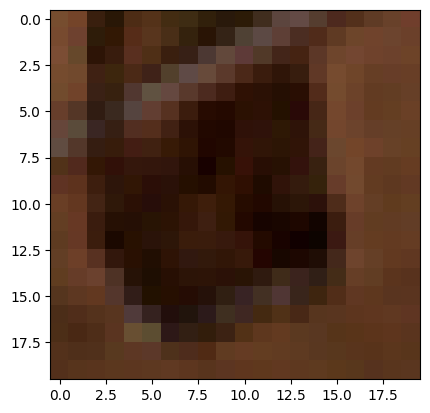

tensor([1, 0])
tensor([0.8618, 0.1382])
Epoch: 5 batch_nr: 8 Time: 40.19871719999355 Time_diff: 0.1704491999989841 loss: 0.4585919744438595
Epoch: 5 batch_nr: 21 Time: 42.23384790000273 Time_diff: 0.1465256999945268 loss: 0.5128702155568383
Epoch: 5 batch_nr: 34 Time: 44.24343199998839 Time_diff: 0.15844489997834899 loss: 0.5844545670918055
new val loss: 0.5608816255222667
Epoch: 6 batch_nr: 7 Time: 47.348994400002994 Time_diff: 0.15035850001731887 loss: 0.5958643238991499
Epoch: 6 batch_nr: 20 Time: 49.32962390000466 Time_diff: 0.14977960000396706 loss: 0.641592882218815
Epoch: 6 batch_nr: 33 Time: 51.5118564000004 Time_diff: 0.15231390000553802 loss: 0.5827580558903077

 New best loss: 0.5089329752055082


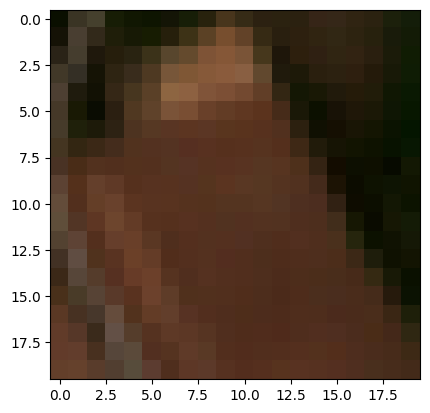

tensor([1, 0])
tensor([0.8638, 0.1362])
Epoch: 7 batch_nr: 6 Time: 54.85204309999244 Time_diff: 0.1737530000100378 loss: 0.6043965220451355
Epoch: 7 batch_nr: 19 Time: 56.957925499998964 Time_diff: 0.1508783999888692 loss: 0.5135753750801086
Epoch: 7 batch_nr: 32 Time: 58.97270139999455 Time_diff: 0.14543829998001456 loss: 0.5505946201808525
new val loss: 0.5135294524106112
Epoch: 8 batch_nr: 5 Time: 62.06469160001143 Time_diff: 0.15183990000514314 loss: 0.6346076081196467
Epoch: 8 batch_nr: 18 Time: 64.06998400000157 Time_diff: 0.16399870000896044 loss: 0.5438074500937211
Epoch: 8 batch_nr: 31 Time: 66.07986610001535 Time_diff: 0.16674249997595325 loss: 0.5579071366228163

 New best loss: 0.5071970874612982


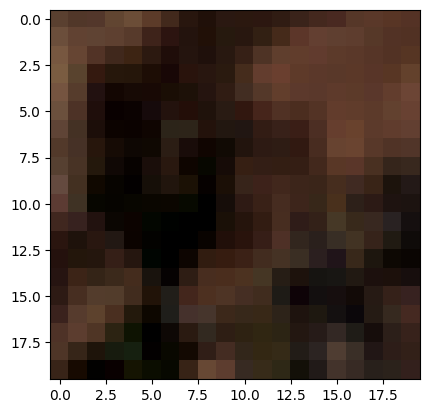

tensor([0, 1])
tensor([0.8594, 0.1406])
Epoch: 9 batch_nr: 4 Time: 70.13864180000382 Time_diff: 0.21710280000115745 loss: 0.5097769767045974
Epoch: 9 batch_nr: 17 Time: 72.66507089999504 Time_diff: 0.18945629999507219 loss: 0.5603688375817405
Epoch: 9 batch_nr: 30 Time: 75.01211320000584 Time_diff: 0.17932980001205578 loss: 0.5883103089947854
new val loss: 0.5427276749502529
Epoch: 10 batch_nr: 3 Time: 78.8897060000163 Time_diff: 0.18470759998308495 loss: 0.3801957555115223
Epoch: 10 batch_nr: 16 Time: 81.2667885000119 Time_diff: 0.17882230001850985 loss: 0.5531035363674164
Epoch: 10 batch_nr: 29 Time: 83.61874569999054 Time_diff: 0.17650699999649078 loss: 0.5991411487261454
new val loss: 0.5324473272670399
Epoch: 11 batch_nr: 2 Time: 87.37761060000048 Time_diff: 0.19686450000153854 loss: 0.5409085750579834
Epoch: 11 batch_nr: 15 Time: 89.78105540000251 Time_diff: 0.17898150000837632 loss: 0.5533688273280859
Epoch: 11 batch_nr: 28 Time: 92.2060688000056 Time_diff: 0.20308020000811666 l

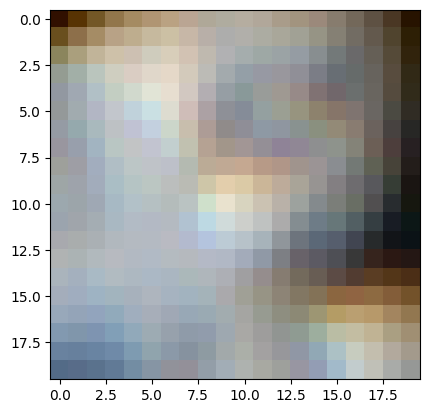

tensor([1, 0])
tensor([0.0016, 0.9984])
Epoch: 27 batch_nr: 12 Time: 228.2709734000091 Time_diff: 0.17506810001214035 loss: 0.5192695305897639
Epoch: 27 batch_nr: 25 Time: 230.63005750000593 Time_diff: 0.18684730000677519 loss: 0.5922271357132838
new val loss: 0.5148533623326909
Epoch: 28 batch_nr: 11 Time: 237.11688650000724 Time_diff: 0.18048680000356399 loss: 0.5471028362711271
Epoch: 28 batch_nr: 24 Time: 239.5961624000047 Time_diff: 0.1749710000003688 loss: 0.6165278434753418
Epoch: 28 batch_nr: 37 Time: 241.78534750000108 Time_diff: 0.032578400016063824 loss: 0.5541343132131978
new val loss: 0.5152622989632867
Epoch: 29 batch_nr: 10 Time: 245.61897730000783 Time_diff: 0.19077750001451932 loss: 0.6831822286952626
Epoch: 29 batch_nr: 23 Time: 248.05497070000274 Time_diff: 0.17905800000880845 loss: 0.5976022587468227
Epoch: 29 batch_nr: 36 Time: 250.42188470001565 Time_diff: 0.17353759999969043 loss: 0.5664624217394236
new val loss: 0.523023243654858
Epoch: 30 batch_nr: 9 Time: 254.

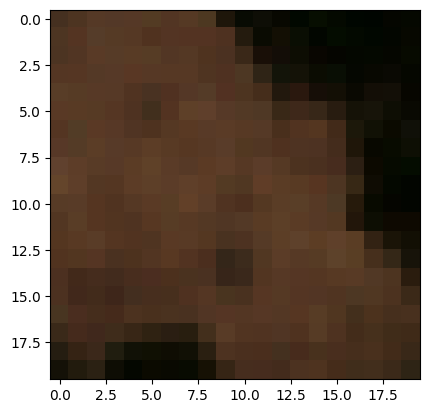

tensor([1, 0])
tensor([0.8616, 0.1384])
Epoch: 31 batch_nr: 8 Time: 262.73772609999287 Time_diff: 0.19578089998685755 loss: 0.6257286071777344
Epoch: 31 batch_nr: 21 Time: 265.11809520001407 Time_diff: 0.18395359997521155 loss: 0.5587641813538291
Epoch: 31 batch_nr: 34 Time: 267.5967435000057 Time_diff: 0.17858619999606162 loss: 0.5774198395865304
new val loss: 0.5899985107508573
Epoch: 32 batch_nr: 7 Time: 271.3399931000022 Time_diff: 0.1826602999935858 loss: 0.6157983969897032
Epoch: 32 batch_nr: 20 Time: 273.6591042999935 Time_diff: 0.17555439998977818 loss: 0.6237746597755522
Epoch: 32 batch_nr: 33 Time: 276.0366995999939 Time_diff: 0.18627949999063276 loss: 0.5853512335349532
new val loss: 0.5419594862244346
Epoch: 33 batch_nr: 6 Time: 279.7241040999943 Time_diff: 0.17815279998467304 loss: 0.5607730618544987
Epoch: 33 batch_nr: 19 Time: 282.0770693999948 Time_diff: 0.17311879998305812 loss: 0.591485745459795
Epoch: 33 batch_nr: 32 Time: 284.4529349000077 Time_diff: 0.1825539999990

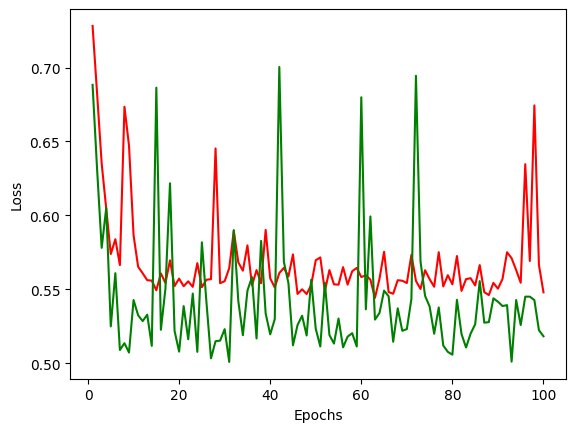

In [46]:
import copy
from time import perf_counter

epochs=100

def train_model(train_loader, val_loader, model, criterion, optimizer, scheduler):
    start_time = perf_counter()
    time = 0

    best_loss = float('inf')

    train_loss = []
    val_loss = []
    for epoch in range(epochs):
        avg_loss_list = []
        for batch_nr, (images,labels) in enumerate(train_loader):
            
            #Forward pass
            predictions = model(images)
            loss = criterion(predictions,labels.float())
            avg_loss_list.append(loss.item())
            
            if((batch_nr+epoch)%13==0):
                print("Epoch:",epoch,"batch_nr:",batch_nr,"Time:",perf_counter()-start_time,"Time_diff:",perf_counter()-start_time-time,"loss:",(sum(avg_loss_list)/len(avg_loss_list)))
            time=perf_counter()-start_time

            #Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Update learning rate
            scheduler.step()

        avg_val_loss_list = []
        #Grabs next iterator batch, restarts if at end of iterator
        for batch_nr, (images_valid,labels_valid) in enumerate(val_loader):
        #Forward - Validation
            predictions = model(images_valid)
            v_loss = criterion(predictions,labels_valid.float())
            avg_val_loss_list.append(v_loss.item())

        
        train_loss.append((sum(avg_loss_list)/len(avg_loss_list)))
        val_loss.append((sum(avg_val_loss_list)/len(avg_val_loss_list)))

        #Finds best model
        if (val_loss[-1]<best_loss):
            best_loss=val_loss[-1]
            best_model = copy.deepcopy(model)
            torch.save(model, 'CNN1b.pt')
            print("\n New best loss:",best_loss)
            plt.figure()
            plt.imshow(images_valid[0][:3].permute(1,2,0))
            plt.show()
            
            print(labels[0])
            print(nn.Softmax(dim=1)(predictions.detach())[0])
        else:
            print("new val loss:",val_loss[-1])

    
    plt.plot(range(1,epochs+1),train_loss, color='r', label='losses')
    plt.plot(range(1,epochs+1),val_loss, color='g', label='losses_valid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    return best_model

    

model = LeNet(11,2)
optimizer = optim.Adam(model.parameters(),lr=3e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.9)
criterion = nn.CrossEntropyLoss(weight=torch.Tensor([1.0,2.611111111111111])) #weight=torch.Tensor([1.0,2.611111111111111])

best_model=train_model(training_loader,validation_loader,model,criterion,optimizer,scheduler)


In [47]:
test_dataset = CloudClassificationDatasetCNN.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_test.npy",channels=("b04","b03","b02","b01","b05","b06","b07","b08","b09","b11","b12"),transform=transforms)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
model = torch.load("CNN1b.pt").eval()
# Creates an iterator and plots the pictures
it = iter(test_loader)



In [50]:
cloud=0
ncloud=0
for batch_nr, (_,labels) in enumerate(training_loader):
    for label in labels:
        if torch.argmax(label).item()==0:
            ncloud+=1
        else:
            cloud+=1

print("cloud:",cloud)
print("ncloud:",ncloud)
print(max(cloud,ncloud)/cloud)
print(max(cloud,ncloud)/ncloud)

cloud: 72
ncloud: 188
2.611111111111111
1.0


In [74]:
def from_one_hot(label):
    return np.argmax(label,0)

In [48]:
CM = [[0,0],
      [0,0]]

correct=0
total=0

for batch_nr, (images,labels) in enumerate(test_loader):
    preds = model(images)
    preds2 = nn.Softmax(dim=1)(preds.detach())
    preds2bin = (torch.zeros(preds2.shape).scatter (1, preds2.argmax(1).unsqueeze(1), 1.0).to(torch.int64))
    for pred, label in zip(preds2bin,labels):
        total+=1
        for a_class in range(2):
            for p_class in range(2):
                if(pred[p_class].item()==1 and label[a_class].item()==1):
                    CM[a_class][p_class] += 1

print("Confusion Matrix:")
print(CM[0][0],"\t",CM[0][1])
print(CM[1][0],"\t",CM[1][1])

print()
prec = CM[0][0]/(CM[0][0]+CM[1][0])
reca = CM[0][0]/(CM[0][0]+CM[0][1])
f1 = (2*prec*reca)/(prec+reca)
acc = (CM[0][0]+CM[1][1])/total
print("precision:",prec)
print("recall:",reca)
print("f1:",f1)
print("accuracy:",f1)


60 	 12
4 	 24
100
precision: 0.9375
recall: 0.8333333333333334
f1: 0.8823529411764706
accuracy: 0.8823529411764706
